In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# import emoji 

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("../data/twitter_quotes.csv")
df.head()

,id,id_str,tweet,"label (0:คนปกติ, 1:io)",language,conversation_id,created_at,date,time,timezone,...,quote_url,video,geo,near,source,time_update,translate,trans_src,trans_dest,keyword
0,1.162571e+18,1.162571e+18,@zeeill บ้านเมืองเดือดร้อนวุ่นวายขนาดนี้ ไม่ให...,1,th,1.162341e+18,2019-08-17 10:45:59 SE Asia Standard Time,2019-08-17,10:45:59,700,...,NaN,0,NaN,NaN,NaN,1603127298878,NaN,NaN,NaN,บ้านเมืองเดือดร้อน
1,1.251352e+18,1.251352e+18,@nomi_nee เห็นด้วยคะ ดีมาก เวลาบ้านเมืองเดือดร...,1,th,1.251134e+18,2020-04-18 10:27:51 SE Asia Standard Time,2020-04-18,10:27:51,700,...,NaN,0,NaN,NaN,NaN,1603127276312,NaN,NaN,NaN,บ้านเมืองเดือดร้อน
2,1.045623e+18,1.045623e+18,@DeFirenze พวกจาบจ้วงสถาบันก็เช่นกัน,1,th,1.045621e+18,2018-09-28 17:33:59 SE Asia Standard Time,2018-09-28,17:33:59,700,...,NaN,0,NaN,NaN,NaN,1603128157824,NaN,NaN,NaN,จาบจ้วงสถาบัน
3,1.293108e+18,1.293108e+18,“สุดารัตน์” ไม่เห็นด้วยจาบจ้วงสถาบัน https://...,0,th,1.293108e+18,2020-08-11 15:50:28 SE Asia Standard Time,2020-08-11,15:50:28,700,...,NaN,0,NaN,NaN,NaN,1603129947131,NaN,NaN,NaN,จาบจ้วงสถาบัน
4,1.293148e+18,1.293148e+18,@Sulovebossss ป้าหน่อยออกมาประกาศเพื่อไทยไม่สน...,1,th,1.293144e+18,2020-08-11 18:30:47 SE Asia Standard Time,2020-08-11,18:30:47,700,...,NaN,0,NaN,NaN,NaN,1603127380825,NaN,NaN,NaN,จาบจ้วงสถาบัน


In [3]:
tweet = df['tweet']
label = df['label (0:คนปกติ, 1:io)']

# Preprocessing

In [4]:
def remove_mention(text):
    output = re.sub("@[A-Za-zก-๏0-9_]+","", text)
    return output
def remove_link(text):
    output = re.sub(r'https?:\/\/\S*', "", text, flags=re.MULTILINE)
    return output
def remove_punctuation(text):
    output = re.sub('[^a-z0-9ก-๏] ', "", text)
    return output
def remove_space(text):
    text = text.strip()
    output = re.sub("[\s+]", '', text)
    return output
def preprocess(text):
    text = remove_mention(text)
    text = remove_link(text)
    text = remove_punctuation(text)
#     text = remove_space(text)
    return text

# idx = 34
# print(tweet[idx])
# print(remove_link(tweet[idx]))
# print(remove_mention(tweet[idx]))
# print(preprocess(tweet[idx]))


In [5]:
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

# remove mention, links, and punctuations before processing
tweet = tweet.map(lambda x: preprocess(x))
# process tweet as default of thaipynlp
tweet = tweet.map(lambda x: "|".join(process_thai(x))) # processed tweets
wc = tweet.map(lambda x: len(x.split("|"))) # word counts
uwc = tweet.map(lambda x: len(set(x.split("|")))) # unique word counts
tweet

0       บ้านเมือง|เดือดร้อน|วุ่นวาย|ขนาด|นี้|ไม่|ให้กำ...
1       เห็นด้วย|คะ|ดีมาก|เวลา|บ้านเมือง|เดือดร้อน|ต้อ...
2                           พวก|จาบจ้วง|สถาบัน|ก็|เช่นกัน
3             “|สุดา|รัตน์|ไม่เห็นด้วย|จาบจ้วง|สถาบัน|via
4       ป้า|หน่อย|ออกมา|ประกาศ|เพื่อ|ไทย|ไม่|สนับสนุน|...
                              ...                        
5197    เล่า|จริงๆ|ครับ|เล่า|แบบ|ไร้|หลักฐาน|รองรับ|ด้...
5198    fy|ผม|ไม่ได้|รัก|ร.|10|ครับ|แต่|ก็|ยัง|ไม่ได้|...
5199    ตอนนี้|ผม|ก็|ไม่ได้|ศรัทธา|ราชวงศ์|นะ|คือ|ไม่ไ...
5200    บางที|ผม|ก็|สงสาร|ร.|10|นะ|โฆษณา|ผลงาน|ก็|โดน|...
5201    ชอบ|บท|สัมภาษณ์|ของ|ร.|10|เมื่อ|ครั้ง|ทรง|เป็น...
Name: tweet, Length: 5202, dtype: object

# modeling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(tweet, label, test_size=0.2, random_state=1412)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4161,), (1041,), (4161,), (1041,))

In [10]:
y_train.mean(), y_valid.mean()

(0.9151646238884883, 0.930835734870317)

## Logistic regression

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(X_train)
text_train = tfidf_fit.transform(X_train)
text_valid = tfidf_fit.transform(X_valid)
text_train.shape, text_valid.shape

((4161, 2364), (1041, 2364))

In [17]:
#fit logistic regression models
model = LogisticRegression(C=2., penalty="l2", solver="liblinear", dual=False, multi_class="ovr")
model.fit(text_train.toarray(),y_train)
preds = model.predict(text_valid.toarray())
score = model.score(text_valid.toarray(),y_valid)
score

0.9337175792507204

# Metrics

0.9337175792507204


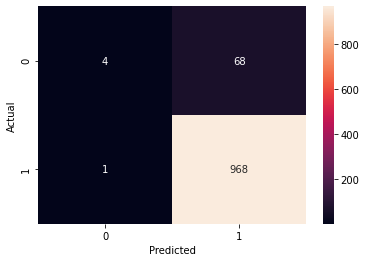

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_mat = confusion_matrix(y_valid, preds)
print(score)
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ULMFit

ongoing

In [27]:
from fastai.text import *
# from fastai.callbacks import CSVLogger, SaveModelCallback
from pythainlp.ulmfit import *

In [28]:
tt = Tokenizer(tok_func=ThaiTokenizer, lang="th", pre_rules=pre_rules_th, post_rules=post_rules_th)
processor = [TokenizeProcessor(tokenizer=tt, chunksize=10000, mark_fields=False),
            NumericalizeProcessor(vocab=None, max_vocab=60000, min_freq=2)]

NameError: name 'Tokenizer' is not defined

# BERT attempt -> not yet worked

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors

print('Using Tensorflow version:', tf.__version__)

In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
             texts, 
             return_attention_masks=False, 
             return_token_type_ids=False,
             pad_to_max_length=True,
             max_length=maxlen)
    
    return np.array(enc_di['input_ids'])

In [ ]:
def build_model(transformer, max_len=512):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(5, activation='softmax')(cls_token) # 5 ratings to predict
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# For tf.dataset
AUTO = tf.data.experimental.AUTOTUNE

# Configuration
EPOCHS = 4
BATCH_SIZE = 16 
MODEL = 'jplu/tf-xlm-roberta-large' # bert-base-multilingual-uncased
# MODEL = 'albert-xxlarge-v2' #

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(tweet,
                                                  label,
                                                  stratify=label,
                                                  test_size=0.2,
                                                  random_state=2020)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [ ]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
MAX_LEN = 192

X_train = regular_encode(X_train.values, tokenizer, maxlen=MAX_LEN)
X_val = regular_encode(X_val.values, tokenizer, maxlen=MAX_LEN)
# X_test = regular_encode(test_df['review'].values, word_tokenizer, maxlen=MAX_LEN)

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .repeat()
    .shuffle(1024)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test)
    .batch(BATCH_SIZE)
)